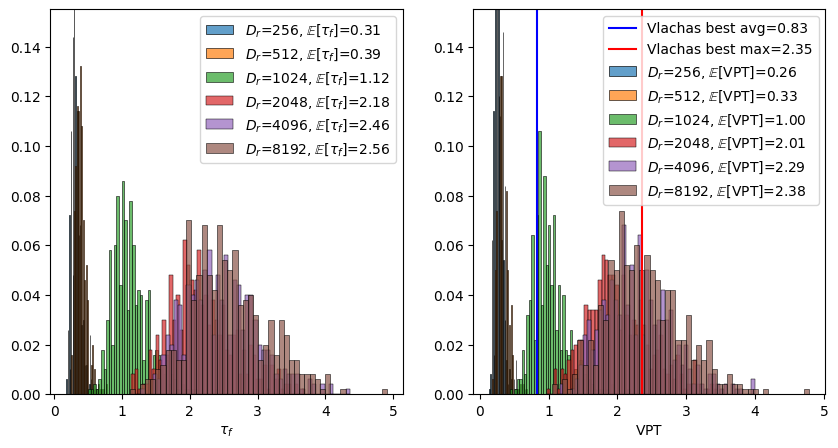

In [38]:
import os, sys 
from pathlib import Path
from os.path import dirname, realpath
script_dir = Path(dirname(realpath('.')))
module_dir = str(script_dir)
sys.path.insert(0, module_dir + '/modules')
import numpy as np
import utility as ut
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from scipy import stats
import seaborn as sns
import eulerN as arch 
import torch
from torch import nn

dynamical_system = 'L96'
architecture = 'EulerN'
data_folder = f'../data/{dynamical_system}/{architecture}'
D_r_list = [256, 512, 1024, 2048, 4096, 8192]
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
for D_r in D_r_list:
    data_file = f'{data_folder}/D_r-{D_r}/batch_data.csv'
    data = pd.read_csv(data_file)
    y = data['tau_f_se']
    sns.histplot(y, ax=ax1, alpha=0.7, label=fr'$D_r$={D_r},'+r'$\;\mathbb{E}[\tau_f]$='+f'{y.mean():.2f}', stat='probability', bins=50)
    y = data['tau_f_nmse']
    sns.histplot(y, ax=ax2, alpha=0.7, label=fr'$D_r$={D_r},'+r'$\;\mathbb{E}[\text{VPT}]$='+f'{y.mean():.2f}', stat='probability', bins=50)
ax2.axvline(0.83, label='Vlachas best avg=0.83', c='blue')
ax2.axvline(2.35, label='Vlachas best max=2.35', c='red')
ax1.set_ylabel('')
ax2.set_ylabel('')
ax1.set_xlabel(r'$\tau_f$')
ax2.set_xlabel(r'$\text{VPT}$')
ax1.legend()
ax2.legend()
ax1.set_ylim((0, 0.155))
ax2.set_ylim((0, 0.155))
plt.savefig(f'../data/plots/{dynamical_system}.png', bbox_inches='tight', dpi=300)